# Matplotlib Scatter Plots

**df.plot(kind='scatter')**

In [55]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Scatter Plots

These type of plots are **great** for showing **correlation** between multiple variables.

In this example here, we're able to see things like median salary, and also the demand (or count) of a certain skill correlate to each other.

***Spoiler alert:*** *We can see Python at the top here, because not only it is a **highly paid skill**, but also it has a **high demand** based on where it is in the x-axis.*

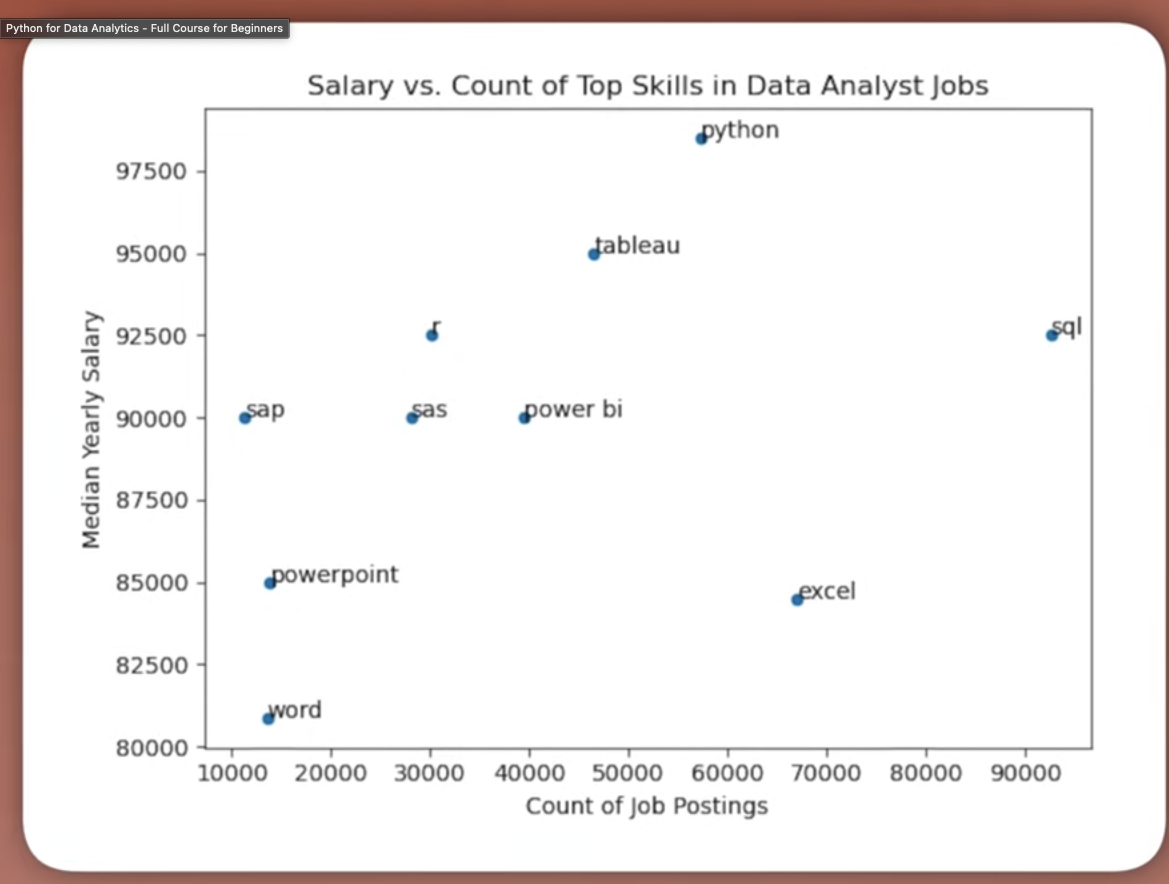

Let's get into some examples, starting with this simple one:

In [56]:
# Creating a dictionary called data with ficticious data
data = {
    'job_skills': ['python','sql', 'java', 'c++', 'c#', 'javascript', 'html', 'css', 'php', 'ruby'],
    'skill_count': [30, 25, 20, 15, 10, 5, 4, 3, 2, 1],
    'skill_pay': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
}
# Converting the dictionary into a DataFrame so we can plot it
df_data = pd.DataFrame(data)

In [57]:
df_data

,job_skills,skill_count,skill_pay
0,python,30,100
1,sql,25,90
2,java,20,80
3,c++,15,70
4,c#,10,60
5,javascript,5,50
6,html,4,40
7,css,3,30
8,php,2,20
9,ruby,1,10


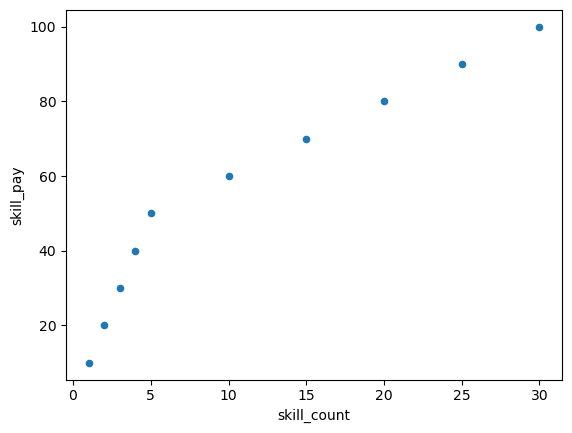

In [58]:
df_data.plot(kind='scatter', x='skill_count', y='skill_pay')
plt.show()

### Using our data_jobs dataset

Now we need to get our data in a form similar to what we provided of the skill_pay and also the skill_count, aggregated by each of those skills. For this, we need to create this DataFrame, which has 3 columns; the first one is the index of the job skills itself, and then for each one of those skills we need to know what the median salary is, and what the count is.

The purpose of this format is so that we can use that median salary as the y-axis, and the count of those skills as the x-axis, on our scatter plot.


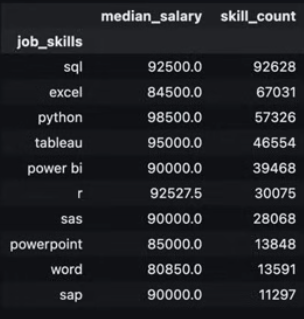

In [59]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [60]:
# Now let's explode the job_skills column
df_exploded = df_DA.explode('job_skills')
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}"
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [61]:
# Now we need to do a grouping, specifically for the job_skills, 
# we need to group the job skills in order to get a count of these skills, 
# but then also for the salary_year_avg column, 
# we need to aggregate for each of those skills, the median salary

# Running a simple size() on this we can see the different counts for these different job skills
df_exploded.groupby('job_skills').size()

job_skills
airflow       2002
airtable        88
alteryx       4570
angular        376
angular.js       2
              ... 
wrike           39
wsl             16
xamarin          2
yarn            76
zoom           465
Length: 235, dtype: int64

In [62]:
# Remember that we want not only the counts of these skills, but also what is their associated median salary.

# Since there are multiple aggregation functions, we need to use the agg() method

df_exploded.groupby('job_skills').agg(
    # we're going to use a dictionary in order to find key and values for how we want to do these different aggregations
    # we're going to start with something simple: the skill_count
    #creating a new column called skill_count and setting it to a tuple of 2 variables \
    # 1:'job_skills' is where we want to do the aggregation
    # 2: the method we want = count
    skill_count=('job_skills', 'count'),
    # Create a new column called median salary
    median_salary=('salary_year_avg', 'median')
)

,skill_count,median_salary
job_skills,,
airflow,2002,111175.0
airtable,88,90000.0
alteryx,4570,105000.0
angular,376,109101.0
angular.js,2,NaN
...,...,...
wrike,39,75000.0
wsl,16,NaN
xamarin,2,NaN


In [ ]:
# we're going to store the code above in a varible so we can get into sorting the values of it. 
# Right now it's only in alphabetical order by the names.

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

In [ ]:
# Now let's sort by the skill_count column
skill_stats.sort_values(by='skill_count', ascending=False).head(10)

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


<Axes: xlabel='skill_count', ylabel='median_salary'>

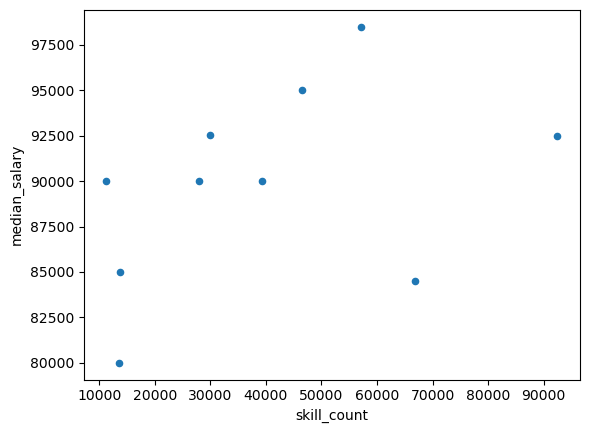

In [70]:
# Now we're going to store the previous dataframe into a variable and plot it
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)
skill_stats.plot(kind='scatter',x='skill_count', y='median_salary')

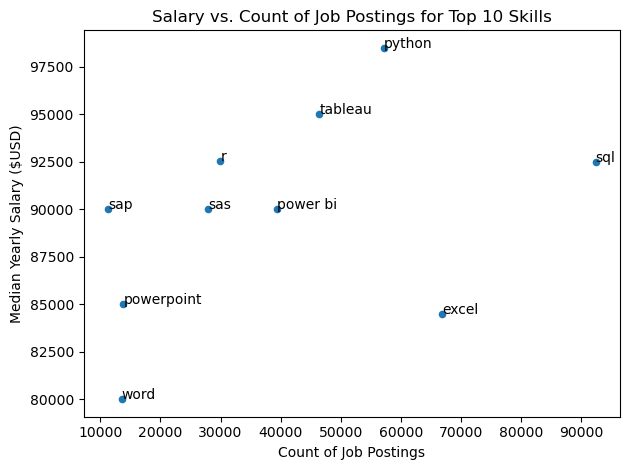

In [71]:
# let's clean up this bad boy by adding lables and tile
skill_stats.plot(kind='scatter',x='skill_count', y='median_salary')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

plt.show()


